In [30]:
import numpy as np
import fractaltools
import matplotlib.pyplot as plt
import collections
from decimal import *

In [2]:
# Recursevly Generate the weights from a seed

def fractal_weights(num_steps, seed):
    result = np.array([1])
    seed   = np.asarray(seed)
    
    if len(seed.shape) == 1:
        # Normalize seed to sum 1
        seed   = seed / seed.sum()
        
        # Constant seed
        seed = np.reshape(np.tile(seed, num_steps), (num_steps, -1))
    elif seed.shape[0] != num_steps:
        raise Exception('Wrong seed shape')
     
    for i in range(num_steps):
        step_result = [seed[i] * w for w in result]
        result      = np.hstack(step_result)
        
    return result


# Generate the ponints using a uniform random distribution

def generate_points(point_dist):
    num_sectors = point_dist.shape[0]
    angle_step  = 2 * np.pi / num_sectors
    result      = []

    # Generate the angle according to the points distribution
    for i in range(num_sectors):
        theta  = np.random.uniform(size=(point_dist[i],)) * angle_step

        # Adjust the angle bias
        theta  = theta + i * angle_step

        result.append(theta)


    theta  = np.hstack(result)
    ro     = np.random.uniform(size=(theta.shape[0],)) ** (1/2)
    
    return np.vstack([ro, theta]).T



def pol2cart(points):
    """
        Converts polar coordinates to cartesian.
        Input:   N by 2 matrix with ro in first column and theta in the second
        Returns: N by 2 matrix with x in the first columns and y in the second
    """
    x = points[:, 0] * np.cos(points[:, 1])
    y = points[:, 0] * np.sin(points[:, 1])
    
    return np.vstack([x, y]).T



def spectrum(points, ref = (0, 0)):
    powers     = list(range(-10, 11))
    scales     = np.pi / 2 ** np.array(range(5))
    
    points     = fractaltools.cart2pol(points, ref)
    rho, theta = zip(*points)
    
    a, f       = fractaltools.spectrum(np.asarray(theta), powers, scales)
    
    return a, f


def threshold(data, threshold):
    ro = np.sqrt(data[:,0] ** 2 + data[:,1] ** 2)
    
    return ro < threshold

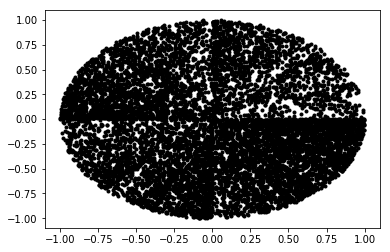

In [3]:
weights    = np.round(fractal_weights(9, [0.4, 0.6]) * 10000)
point_dist = weights.astype(int)
points     = pol2cart(generate_points(point_dist))

plt.plot(points[:,0], points[:,1], '.k')

In [4]:
idx   = threshold(points, 0.64)
print(sum(idx))

np.savetxt("fractal-data-points.txt", points[idx, :],  fmt="%.4f", header="x y")

4049


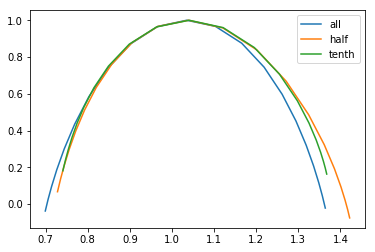

In [5]:
# All points spectrum
a, f      = spectrum(points)

# Half points spectrum
idx_half  = threshold(points, 0.7)

points_h  = points[idx_half, :]
ah, fh    = spectrum(points_h)

# Tenth points spectrum
idx_tenth = threshold(points, 0.33)

points_t  = points[idx_tenth, :]
at, ft    = spectrum(points_t)


plt.plot(a, f, label="all")
plt.plot(ah, fh, label="half")
plt.plot(at, ft, label="tenth")
plt.legend()

In [6]:
np.savetxt("fractal-spectrum.txt", np.vstack([a, f, ah, fh, at, ft]).T, fmt="%.4f", header="a f ah fh at ft")

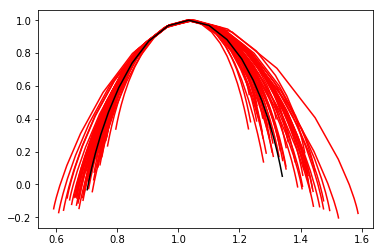

In [7]:
for i in range(50):
    pts   = pol2cart(generate_points(point_dist))
    idx   = threshold(pts, 0.33)
    a, f  = spectrum(pts[idx, :])
    
    plt.plot(a, f, 'r')
    

a, f  = spectrum(pts)
    
plt.plot(a, f, 'k')

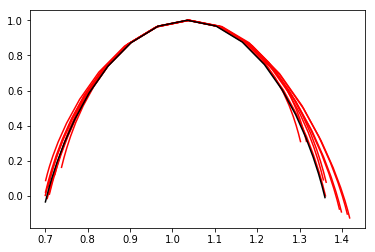

In [8]:
threshold_array = [0.31, 0.44, 0.54, 0.63, 0.7, 0.77, 0.83, 0.89, 0.95]
pts   = pol2cart(generate_points(point_dist))

res = []
header = ""

a, f  = spectrum(pts)
res.append(a)
res.append(f)
header = header + "a f "

for i, th in enumerate(threshold_array):
    idx   = threshold(pts, th)
    a, f  = spectrum(pts[idx, :])
    plt.plot(a, f, 'r')
    res.append(a)
    res.append(f)
    header = header + "a{0} f{0} ".format(i + 1)
    
a, f  = spectrum(pts)
plt.plot(a, f, 'k')

In [9]:
np.array(threshold_array) * 0.63

array([0.1953, 0.2772, 0.3402, 0.3969, 0.441 , 0.4851, 0.5229, 0.5607,
       0.5985])

In [10]:
np.savetxt("fractal-spectrum-10.txt", np.vstack(res).T, fmt="%.4f", header=header)

## Changing Fractal


In [11]:
seed       = np.hstack([np.tile([0.4, 0.6], 3), np.tile([0.45, 0.55], 6)]).reshape((9, -1))
weights    = np.round(fractal_weights(9, seed) * 10000)
point_dist = weights.astype(int)

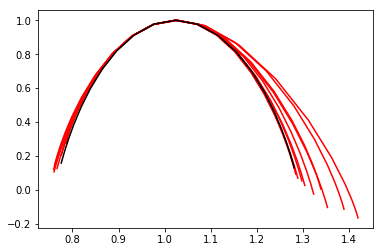

In [12]:
threshold_array = [0.31, 0.44, 0.54, 0.63, 0.7, 0.77, 0.83, 0.89, 0.95]
pts   = pol2cart(generate_points(point_dist))

res = []
header = ""

a, f  = spectrum(pts)
res.append(a)
res.append(f)
header = header + "a f "

for th in threshold_array:
    idx   = threshold(pts, th)
    a, f  = spectrum(pts[idx, :])
    plt.plot(a, f, 'r')
    res.append(a)
    res.append(f)
    header = header + "a{0} f{0} ".format(i + 1)
    
a, f  = spectrum(pts)
plt.plot(a, f, 'k')

In [13]:
np.savetxt("fractal-spectrum-growing-10.txt", np.vstack(res).T, fmt="%.4f", header=header)

# Random Data

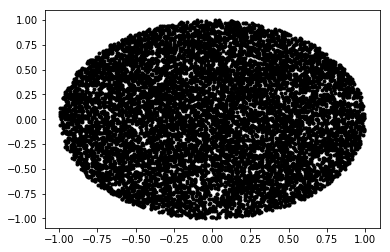

In [14]:
points = np.random.uniform(low=-1, high=1, size=(13000,2))
index  = threshold(points, 1)
points = points[index, :]

plt.plot(points[:,0], points[:,1], '.k')

In [15]:
np.savetxt("random-data-points.txt", points,  fmt="%.4f", header="x y")

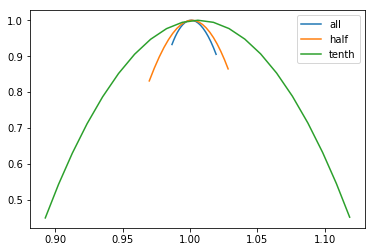

In [16]:
# All points spectrum
a, f      = spectrum(points)

# Half points spectrum
idx_half  = threshold(points, 0.7)

points_h  = points[idx_half, :]
ah, fh    = spectrum(points_h)

# Tenth points spectrum
idx_tenth = threshold(points, 0.33)

points_t  = points[idx_tenth, :]
at, ft    = spectrum(points_t)


plt.plot(a, f, label="all")
plt.plot(ah, fh, label="half")
plt.plot(at, ft, label="tenth")
plt.legend()

610
1573
2658
3846
5093
6348
7631
8700


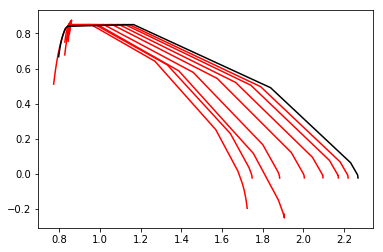

In [17]:
threshold_array = [0.04967748, 0.12264635, 0.20808919, 0.3027957 , 0.40504652,
       0.51374146, 0.62810544, 0.74755784]
pts   = pol2cart(points)

res = []
header = ""

a, f  = spectrum(pts)
res.append(a)
res.append(f)
header = header + "a f "

for th in threshold_array:
    idx   = threshold(pts, th)
    print(sum(idx))
    a, f  = spectrum(pts[idx, :])
    plt.plot(a, f, 'r')
    res.append(a)
    res.append(f)
    header = header + "a{0} f{0} ".format(i + 1)
    
a, f  = spectrum(pts)
plt.plot(a, f, 'k')

In [18]:
np.savetxt("random-spectrum-growing-10.txt", np.vstack(res).T, fmt="%.4f", header=header)

In [19]:
360/512


0.703125

# Difference between expected and actual

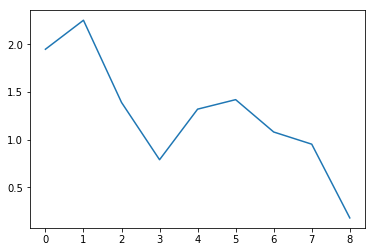

In [20]:
# Compute error as difference to the first one

d = np.loadtxt("fractal-spectrum-10.txt")
r = []

for k in range(2, 20, 2):
    da = d[:, 0] - d[:, k] 
    df = d[:, 1] - d[:, k+1]
    
    e = np.linalg.norm(np.vstack((da, df)), axis=0).sum()
    r.append(e)
    
plt.plot(r)
r1 = r

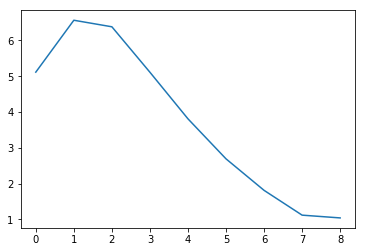

In [22]:
# Compute error as difference to the first one

d = np.loadtxt("random-spectrum-growing-10.txt")
r = []

for k in range(2, 18, 2):
    da = d[:, 0] - d[:, k] 
    df = d[:, 1] - d[:, k+1]
    
    e = np.linalg.norm(np.vstack((da, df)), axis=0).sum()
    r.append(e)

r.append(1.04065916)
plt.plot(r)


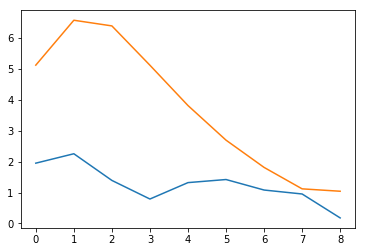

In [23]:
plt.plot(r1)
plt.plot(r)

In [24]:
np.savetxt("growing-error.txt", np.vstack([r1, r]).T, fmt="%.4f", header="fractal random")

# Simulation Experiment - Phase transition

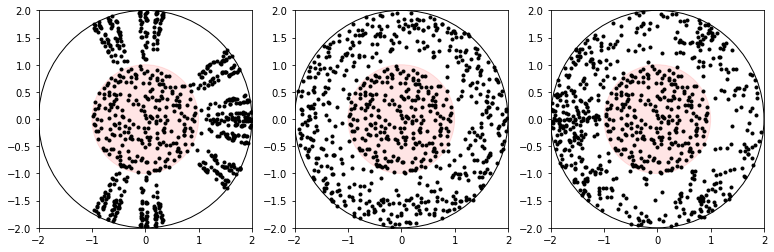

In [25]:
# Generating data for the experiment, monofractal, random, multifractal

N = 500

def split_fractal(initial_set = [1, 0, 1], num_steps = 5, N = 300, bias = None):

    weights     = np.round(fractal_weights(num_steps, initial_set) * N).astype(int)
        
    if bias:
        offset  = np.repeat([[bias, 0]], weights.sum(), axis=0)
    else:
        offset  = 0
    
    sample      = generate_points(weights)
    points      = pol2cart(sample + offset)
    
    return points, sample[:, 1]


def radial_fractal(points):
    plt.plot(points[:,0], points[:,1], '.k')
    
    center  = plt.Circle([0, 0], radius=1, color='red', alpha=0.1)
    outline = plt.Circle([0, 0], radius=2, color='black', fill=None)
    plt.gca().add_artist(center)
    plt.gca().add_artist(outline)
    
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])



seed, seed_theta = split_fractal([1, 1, 1], 5, 300)
mono, mono_theta = split_fractal([1, 0, 1], 5, N, bias = 1)
rand, rand_theta = split_fractal([1, 1, 1], 5, N, bias = 1)
mult, mult_theta = split_fractal([1, 2, 1], 5, N, bias = 1)


pointsmono = np.vstack([seed, mono])
pointsrand = np.vstack([seed, rand])
pointsmult = np.vstack([seed, mult])



plt.figure(figsize=(13, 4))

plt.subplot(1, 3, 1)
radial_fractal(pointsmono)
plt.subplot(1, 3, 2)
radial_fractal(pointsrand)
plt.subplot(1, 3, 3)
radial_fractal(pointsmult)

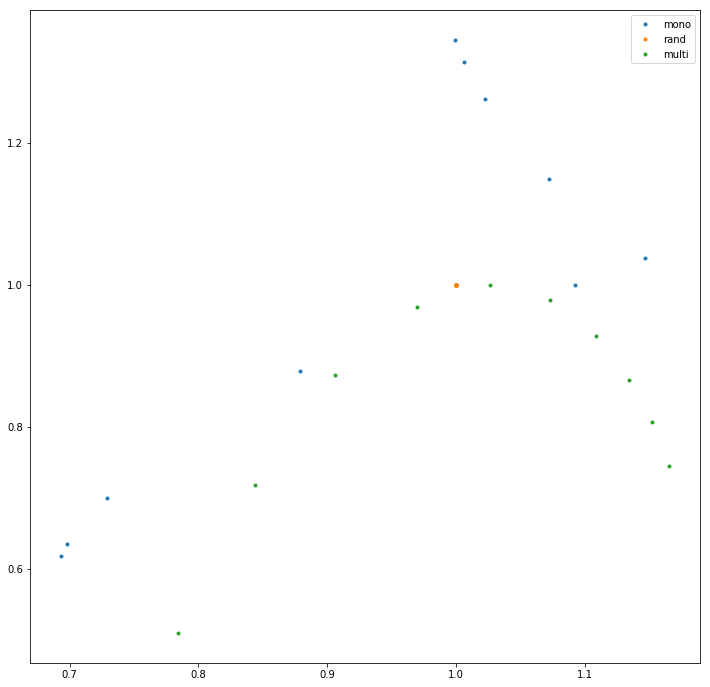

In [32]:
scales     = 2*np.pi / 3 ** np.array(range(1, 4))

def compute_spectrum(points, scales, powers = list(range(-10, 11))):

    result = []
    for scale in scales:
        counts = collections.Counter(np.floor(points / scale)).values()
        # Convert to decimal
        counts = np.array(list(map(Decimal, counts)), dtype=np.dtype(Decimal))
        result.append(counts / counts.sum())

    slopes = []
    x = np.log(scales)

    for q in powers:
        y = [(r ** q).sum().ln() for r in result]

        # fit a line
        A = np.vstack([x, np.ones(x.shape)]).T
        # TODO: add more info about the fit
        fit = np.linalg.lstsq(A, np.array(y, dtype=np.float), rcond=-1)
        slopes.append(fit[0][0])

    # Compute the spectrum
    a = np.gradient(slopes, edge_order=2)
    f = a * powers - slopes

    return a, f

mono_data = np.hstack([seed_theta, mono_theta])
rand_data = np.hstack([seed_theta, rand_theta])
mult_data = np.hstack([seed_theta, mult_theta])

a1, f1 = compute_spectrum(mono_data, scales, powers = list(range(-5, 5)))
a2, f2 = compute_spectrum(rand_data, scales, powers = list(range(-5, 5)))
a3, f3 = compute_spectrum(mult_data, scales, powers = list(range(-5, 5)))

plt.figure(figsize=(12, 12))
ax = plt.gca()

ax.plot(a1, f1, '.', label="mono")
ax.plot(a2, f2, '.', label="rand")
ax.plot(a3, f3, '.', label="multi")

ax.legend()

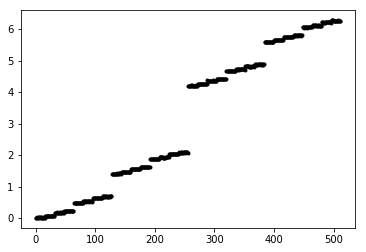

In [33]:
plt.plot(mono_theta, '.k')

# Theoretical constructed spectrum

In [34]:
def mf_spectrum(points, scales, powers):

    result = []
    for scale in scales:
        counts = collections.Counter(np.floor(points / scale)).values()
        # Convert to decimal
        counts = np.array(list(map(Decimal, counts)), dtype=np.dtype(Decimal))
        result.append(counts / counts.sum())

    slopes = []
    x = np.log(scales)

    for q in powers:
        y = [(r ** q).sum().ln() for r in result]

        # fit a line
        A = np.vstack([x, np.ones(x.shape)]).T
        # TODO: add more info about the fit
        fit = np.linalg.lstsq(A, np.array(y, dtype=n, rcond=-1)
        slopes.append(fit[0][0])

    dq = slopes / (np.asarray(powers) - 1)
    # Compute the spectrum
    a  = np.gradient(slopes, edge_order=2)
    f  = a * powers - slopes

    return dq, a, f


def linear_points(point_dist):
    num_sectors = point_dist.shape[0]
    step        = 1 / num_sectors
    result      = []

    # Generate the angle according to the points distribution
    for i in range(num_sectors):
        box  = np.random.uniform(size=(point_dist[i],)) * step

        # Adjust the angle bias
        box  = box + i * step

        result.append(box)
        
    return np.hstack(result)

In [36]:
mono_weights = (fractal_weights(5, [1, 0, 2]) * 1000).astype(int)
points = linear_points(mono_weights)

dq, a, f = mf_spectrum(points, scales, powers = list(range(-5, 5)))

plt.plot(a, f, '.k')
plt.xlim([0, 1.8])
plt.ylim([0, 1])

TypeError: No loop matching the specified signature and casting
was found for ufunc lstsq_n

(0, 2)

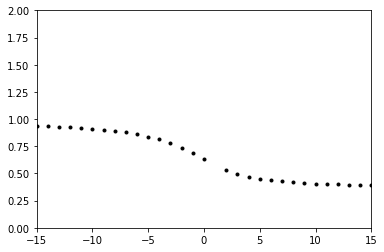

In [164]:
plt.plot(powers, dq, '.k')
plt.xlim([-15, 15])
plt.ylim([0, 2])

In [199]:
import pandas as pd

scales = 1 / 3 ** np.array(range(1, 4))
powers = list(range(-15, 16))

series = []

/Users/valeriu/Software/Miniconda3/envs/fix_numpy/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


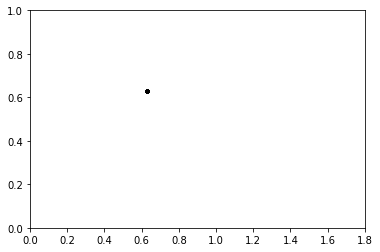

In [207]:
mono_weights = (fractal_weights(5, [1, 0, 1]) * 1000).astype(int)
points = linear_points(mono_weights)

dq, a, f = mf_spectrum(points, scales, powers)

plt.plot(a, f, '.k')
plt.xlim([0, 1.8])
plt.ylim([0, 1])

series.append(pd.Series(dq, index=powers, name="Dq101"))
series.append(pd.Series(a, index=powers, name="a101"))
series.append(pd.Series(f, index=powers, name="f101"))

/Users/valeriu/Software/Miniconda3/envs/fix_numpy/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in true_divide


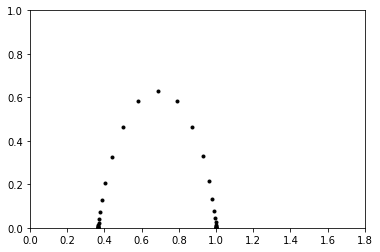

In [208]:
mono_weights = (fractal_weights(5, [1, 0, 2]) * 1000).astype(int)
points = linear_points(mono_weights)

dq, a, f = mf_spectrum(points, scales, powers)

plt.plot(a, f, '.k')
plt.xlim([0, 1.8])
plt.ylim([0, 1])

series.append(pd.Series(dq, index=powers, name="Dq102"))
series.append(pd.Series(a, index=powers, name="a102"))
series.append(pd.Series(f, index=powers, name="f102"))

/Users/valeriu/Software/Miniconda3/envs/fix_numpy/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in true_divide


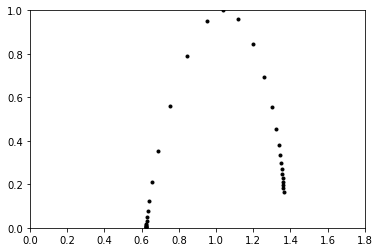

In [209]:
mono_weights = (fractal_weights(5, [1, 2]) * 1000).astype(int)
points = linear_points(mono_weights)

dq, a, f = mf_spectrum(points, scales, powers)

plt.plot(a, f, '.k')
plt.xlim([0, 1.8])
plt.ylim([0, 1])

series.append(pd.Series(dq, index=powers, name="Dq12"))
series.append(pd.Series(a, index=powers, name="a12"))
series.append(pd.Series(f, index=powers, name="f12"))

/Users/valeriu/Software/Miniconda3/envs/fix_numpy/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


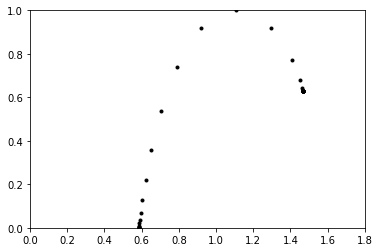

In [210]:
mono_weights = (fractal_weights(5, [1, 1, 2]) * 1000).astype(int)
points = linear_points(mono_weights)

dq, a, f = mf_spectrum(points, scales, powers)

plt.plot(a, f, '.k')
plt.xlim([0, 1.8])
plt.ylim([0, 1])

series.append(pd.Series(dq, index=powers, name="Dq112"))
series.append(pd.Series(a, index=powers, name="a112"))
series.append(pd.Series(f, index=powers, name="f112"))

In [211]:
df = pd.DataFrame(series).T
df.to_csv('experimental-fractals.txt', sep=' ', float_format='%.3f')